<img src="https://uady.mx/assets/img/logo_uady.svg" alt="Imagen" width="170" align="left" style="margin-right: 15px;" />

# Actividad 5 - Universidad Autónoma de Yucatán.
## Profesor: Jorge Armando Argáez Sosa.
### Alumno: Amir Canto Palomo 
### Especialidad en Estadística


Considere la base de datos **universidades.xls**, que contiene información de **25 Universidades**.

Para cada una se consideran las siguientes variables:

a) Calificación promedio obtenida por los admitidos en el examen SAT  
b) Porcentaje de estudiantes en el percentil de al menos 90% en su aprovechamiento  
c) Porcentaje de estudiantes aceptados  
d) Razón de alumnos por profesor  
e) Gastos anuales por alumno  
f) Porcentaje de alumnos graduados  

Se desea agrupar a las universidades, con base en los valores que tienen en esas variables.  
Más aún, se desea dividir a dichas universidades en **3 grupos**, que se identificarían con:  
i) Excelentes,  
ii) Buenas,  
iii) Regulares.  

Como dato adicional, en la base de datos las universidades están ordenadas de mayor a menor, según el reconocimiento que tienen, según lo que personas encuestadas al azar perciben.

---

Aplique el análisis de conglomerados para proponer, en caso de que resulten, los grupos solicitados.  
Deberán entregar un reporte, en el que consideren las siguientes secciones: **Introducción, Metodología, Resultados, Conclusiones**.

Para el análisis deberá considerar diferentes elementos (distancias, método de agrupamiento, estandarizar o no estandarizar) para dar evidencia de la consistencia de los grupos, en caso de que los haya.

---

**Preguntas a considerar:**  
¿Cambian los resultados del análisis cuando se comparan los grupos obtenidos con las variables no estandarizadas y estandarizadas?  
¿Todas las variables son necesarias para la conformación de los grupos?


In [4]:
%pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.4.2_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

In [5]:
df = pd.read_excel("./Universidades.xlsx", engine="openpyxl")

Pequeño análisis exploratorio de las variables.
Podemos observar que las medias de los datos no están "extremadamente separadas" por ahí me da la pista que no debo de estandarizar.
sin embargo para propósitos de comprobación, estandarizaremos variables y comapraremos el análisis sin la estandarización.

In [6]:
df.describe()

,Calificacion en el SAT,% de estudiantes en el percentil del 90% de aprovechamiento,% de estudiantes aceptados,Razón alumnos por profesor,Gastos anuales estimados,Porcentaje de graduacion
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,12.664400,76.480000,39.200000,12.72000,27.388000,86.720000
std,1.083598,19.433905,19.727308,4.06735,14.424883,9.057778
min,10.050000,28.000000,14.000000,6.00000,8.704000,67.000000
25%,12.400000,74.000000,24.000000,11.00000,15.140000,81.000000
50%,12.850000,81.000000,36.000000,12.00000,27.553000,90.000000
75%,13.400000,90.000000,50.000000,14.00000,34.870000,94.000000
max,14.150000,100.000000,90.000000,25.00000,63.575000,97.000000


In [11]:
df.count()

Institución                                                    25
Calificacion en el SAT                                         25
% de estudiantes en el percentil del 90% de aprovechamiento    25
% de estudiantes aceptados                                     25
Razón alumnos por profesor                                     25
Gastos anuales estimados                                       25
Porcentaje de graduacion                                       25
dtype: int64

In [18]:
df.columns # Verificamos las columnas de la base de datos.

Index(['Institucion', 'Calificacion', 'Percent90', 'PercentAceptados',
       'RazonAlumnProf', 'GastoAnual', 'PercentGraduados'],
      dtype='object')

In [16]:
df = df.rename(columns = {'Institución':'Institucion', 'Calificacion en el SAT': 'Calificacion',
       '% de estudiantes en el percentil del 90% de aprovechamiento': 'Percent90',
       '% de estudiantes aceptados':'PercentAceptados', 'Razón alumnos por profesor':'RazonAlumnProf',
       'Gastos anuales estimados':'GastoAnual', 'Porcentaje de graduacion':'PercentGraduados'})

In [19]:
df # Renombramos columnas para una mejor observación de los datos 

,Institucion,Calificacion,Percent90,PercentAceptados,RazonAlumnProf,GastoAnual,PercentGraduados
0,Harv,14.00,91,14,11,39.525,97
1,Princ,13.75,91,14,8,30.220,95
2,Yale,13.75,95,19,11,43.514,96
3,Stanf,13.60,90,20,12,36.450,93
4,MIT,13.80,94,30,10,34.870,91
5,Duke,13.15,90,30,12,31.585,95
6,CalTech,14.15,100,25,6,63.575,81
7,Dartm,13.40,89,23,10,32.162,95
8,Brown,13.10,89,22,13,22.704,94
9,Hopkins,13.05,75,44,7,58.691,87


In [81]:
X = df[df.columns[1:].values].values #df.iloc[:, 1:] # nos deshacemos de las universidades.

In [82]:
X

array([[ 14.   ,  91.   ,  14.   ,  11.   ,  39.525,  97.   ],
       [ 13.75 ,  91.   ,  14.   ,   8.   ,  30.22 ,  95.   ],
       [ 13.75 ,  95.   ,  19.   ,  11.   ,  43.514,  96.   ],
       [ 13.6  ,  90.   ,  20.   ,  12.   ,  36.45 ,  93.   ],
       [ 13.8  ,  94.   ,  30.   ,  10.   ,  34.87 ,  91.   ],
       [ 13.15 ,  90.   ,  30.   ,  12.   ,  31.585,  95.   ],
       [ 14.15 , 100.   ,  25.   ,   6.   ,  63.575,  81.   ],
       [ 13.4  ,  89.   ,  23.   ,  10.   ,  32.162,  95.   ],
       [ 13.1  ,  89.   ,  22.   ,  13.   ,  22.704,  94.   ],
       [ 13.05 ,  75.   ,  44.   ,   7.   ,  58.691,  87.   ],
       [ 12.9  ,  75.   ,  50.   ,  13.   ,  38.38 ,  87.   ],
       [ 12.85 ,  80.   ,  36.   ,  11.   ,  27.553,  90.   ],
       [ 12.8  ,  83.   ,  33.   ,  13.   ,  21.864,  90.   ],
       [ 12.6  ,  85.   ,  39.   ,  11.   ,  28.052,  89.   ],
       [ 13.1  ,  76.   ,  24.   ,  12.   ,  31.51 ,  88.   ],
       [ 12.55 ,  81.   ,  42.   ,  13.   ,  15.122,  9

In [62]:
universidades = df['Institucion'].values

In [73]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [51]:
df[df.columns[1:].values].values

array([[ 14.   ,  91.   ,  14.   ,  11.   ,  39.525,  97.   ],
       [ 13.75 ,  91.   ,  14.   ,   8.   ,  30.22 ,  95.   ],
       [ 13.75 ,  95.   ,  19.   ,  11.   ,  43.514,  96.   ],
       [ 13.6  ,  90.   ,  20.   ,  12.   ,  36.45 ,  93.   ],
       [ 13.8  ,  94.   ,  30.   ,  10.   ,  34.87 ,  91.   ],
       [ 13.15 ,  90.   ,  30.   ,  12.   ,  31.585,  95.   ],
       [ 14.15 , 100.   ,  25.   ,   6.   ,  63.575,  81.   ],
       [ 13.4  ,  89.   ,  23.   ,  10.   ,  32.162,  95.   ],
       [ 13.1  ,  89.   ,  22.   ,  13.   ,  22.704,  94.   ],
       [ 13.05 ,  75.   ,  44.   ,   7.   ,  58.691,  87.   ],
       [ 12.9  ,  75.   ,  50.   ,  13.   ,  38.38 ,  87.   ],
       [ 12.85 ,  80.   ,  36.   ,  11.   ,  27.553,  90.   ],
       [ 12.8  ,  83.   ,  33.   ,  13.   ,  21.864,  90.   ],
       [ 12.6  ,  85.   ,  39.   ,  11.   ,  28.052,  89.   ],
       [ 13.1  ,  76.   ,  24.   ,  12.   ,  31.51 ,  88.   ],
       [ 12.55 ,  81.   ,  42.   ,  13.   ,  15.122,  9

In [56]:
standard = StandardScaler()

In [58]:
X_Scaled = standard.fit_transform(X)

In [59]:
X_Scaled

array([[ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 1.02250664,  0.76255456, -1.30375836, -1.18439038,  0.20037583,
         0.93298158],
       [ 1.02250664,  0.97262469, -1.04507615, -0.43159988,  1.14098185,
         1.04566052],
       [ 0.88122441,  0.71003703, -0.9933397 , -0.18066972,  0.64117435,
         0.70762371],
       [ 1.06960072,  0.92010716, -0.47597528, -0.68253005,  0.52938275,
         0.48226584],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 0.2219073 , -0.07772595,  0.55875358,  0.

In [61]:
universidades

array(['Harv', 'Princ', 'Yale', 'Stanf', 'MIT', 'Duke', 'CalTech',
       'Dartm', 'Brown', 'Hopkins', 'Uchic', 'UPenn', 'Cornell', 'Norwes',
       'Colum', 'Ndame', 'UVir', 'Gtown', 'CarMell', 'Umich', 'UCBerk',
       'Uwisco', 'PeState', 'Purdue', 'TexasAM'], dtype=object)

## Método Ward sin Estandarización


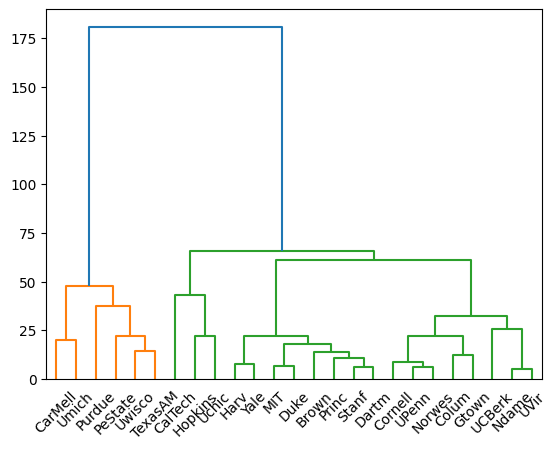

In [84]:
Z = linkage(X, method='ward', metric='euclidean')
dendrogram(Z, labels=universidades)
plt.show()

# Método Ward con Estandarización.

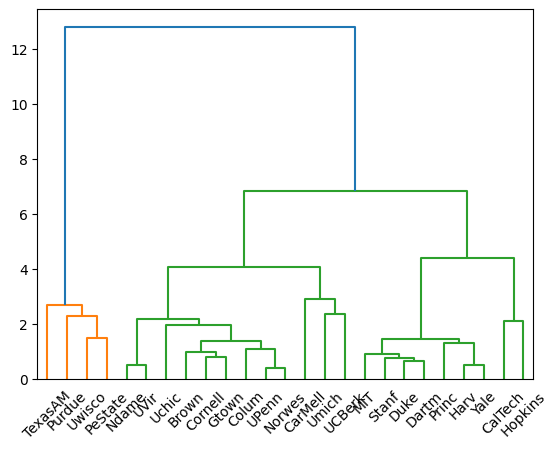

In [87]:
Z = linkage(X_Scaled, method='ward', metric='euclidean')
dendrogram(Z, labels=universidades)
plt.show()

## Método de enlace: Complete linkage sin Estandarizar.

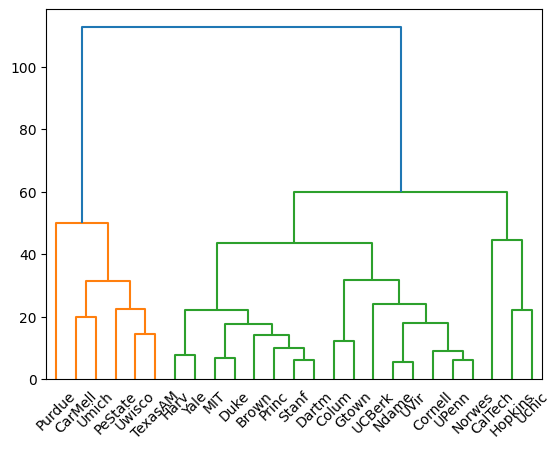

In [77]:
Z = linkage(X, method='complete', metric='euclidean')
dendrogram(Z, labels=universidades)
plt.show()

## Método de enlace: Complete linkage Estandarizado

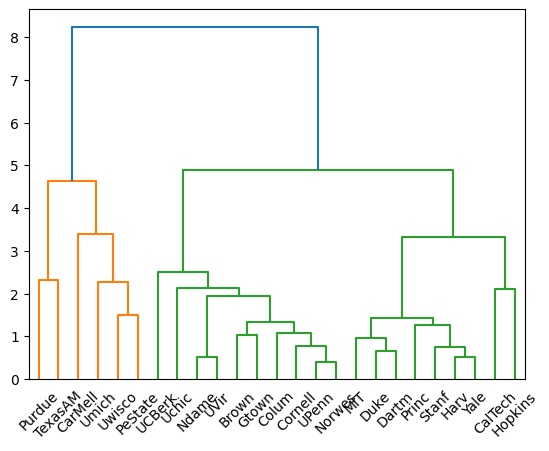

In [86]:
Z = linkage(X_Scaled, method='complete', metric='euclidean')
dendrogram(Z, labels=universidades)
plt.show()

## Método de enlace: Single linkage

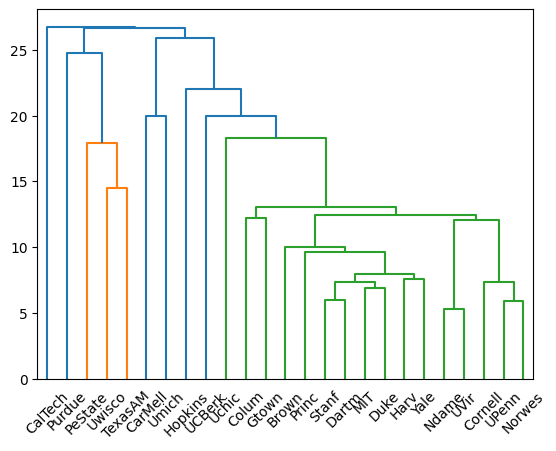

In [76]:
Z = linkage(X, method='single', metric='euclidean')
dendrogram(Z, labels=universidades)
plt.show()

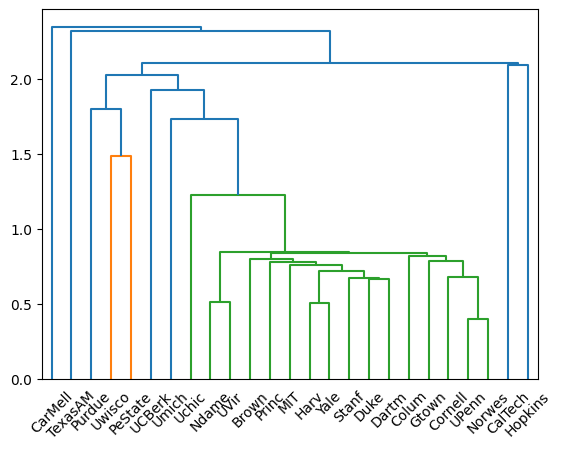

In [239]:
Z = linkage(X_Scaled, method='single', metric='euclidean')
dendrogram(Z, labels=universidades)
plt.show()

## Método de enlace: centroide

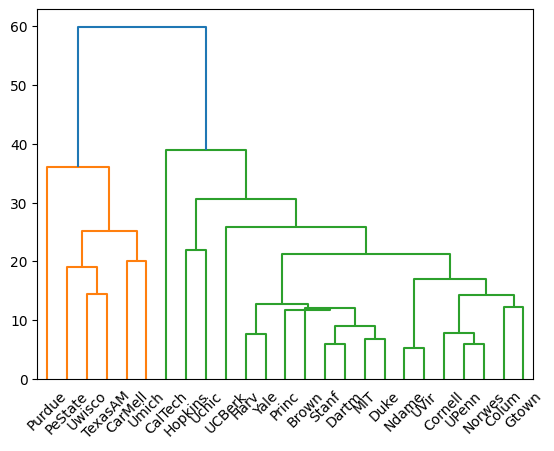

In [79]:
Z = linkage(X, method='centroid', metric='euclidean')
dendrogram(Z, labels=universidades)
plt.show()

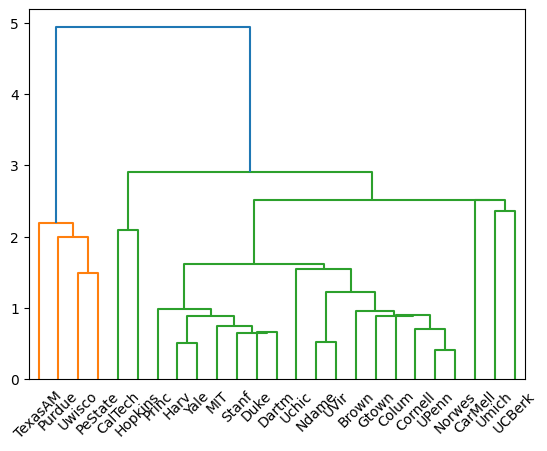

In [240]:
Z = linkage(X_Scaled, method='centroid', metric='euclidean')
dendrogram(Z, labels=universidades)
plt.show()

# Corte de Conglomerados

In [97]:
Z1 = linkage(X_Scaled, method='complete')
Z2 = linkage(X_Scaled, method='ward')


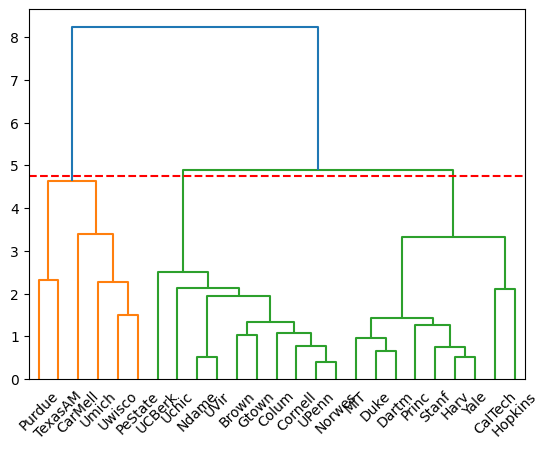

In [107]:
k = 3
clusters1 = fcluster(Z1, t=k, criterion='maxclust')
dendrogram(Z1, labels=universidades)

if k > 1:
    distancia_corte = (Z1[-(k-1), 2] + Z1[-k, 2]) / 2
else:
    distancia_corte = Z1[-1, 2]

plt.axhline(y=distancia_corte, color='red', linestyle='--')

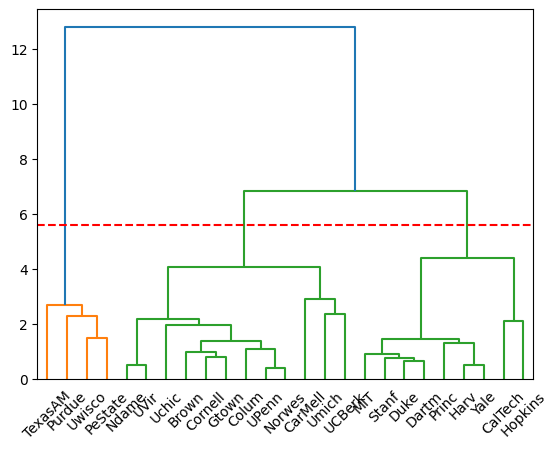

In [180]:
k = 3
clusters2 = fcluster(Z2, t=k, criterion='maxclust')
dendrogram(Z2, labels=universidades)

if k > 1:
    distancia_corte = (Z2[-(k-1), 2] + Z2[-k, 2]) / 2
else:
    distancia_corte = Z2[-1, 2]

plt.axhline(y=distancia_corte, color='red', linestyle='--')

In [114]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score


In [110]:
for k in [2, 3, 4, 5]:
    clusters = fcluster(Z1, t=k, criterion='maxclust')
    silueta = silhouette_score(X_Scaled, clusters)
    print(f'Complete k={k}: Silueta = {silueta:.3f}')

# Para Ward (Z2)  
for k in [2, 3, 4, 5]:
    clusters = fcluster(Z2, t=k, criterion='maxclust')
    silueta = silhouette_score(X_Scaled, clusters)
    print(f'Ward k={k}: Silueta = {silueta:.3f}')

Complete k=2: Silueta = 0.521
Complete k=3: Silueta = 0.301
Complete k=4: Silueta = 0.264
Complete k=5: Silueta = 0.268
Ward k=2: Silueta = 0.550
Ward k=3: Silueta = 0.322
Ward k=4: Silueta = 0.323
Ward k=5: Silueta = 0.313


In [115]:
ari = adjusted_rand_score(clusters1, clusters2)
print(ari)

0.7924080664294187


In [116]:
df['Clusterk3'] = clusters1

In [117]:
df

,Institucion,Calificacion,Percent90,PercentAceptados,RazonAlumnProf,GastoAnual,PercentGraduados,Clusterk3
0,Harv,14.00,91,14,11,39.525,97,3
1,Princ,13.75,91,14,8,30.220,95,3
2,Yale,13.75,95,19,11,43.514,96,3
3,Stanf,13.60,90,20,12,36.450,93,3
4,MIT,13.80,94,30,10,34.870,91,3
5,Duke,13.15,90,30,12,31.585,95,3
6,CalTech,14.15,100,25,6,63.575,81,3
7,Dartm,13.40,89,23,10,32.162,95,3
8,Brown,13.10,89,22,13,22.704,94,2
9,Hopkins,13.05,75,44,7,58.691,87,3


In [118]:
for i in [1, 2, 3]:
    print(f'\n=== CLUSTER {i} ===')
    universidades_cluster = df[df['Clusterk3'] == i]['Institucion']
    print(universidades_cluster.values)
    print(f'Total: {len(universidades_cluster)} universidades')


=== CLUSTER 1 ===
['CarMell' 'Umich' 'Uwisco' 'PeState' 'Purdue' 'TexasAM']
Total: 6 universidades

=== CLUSTER 2 ===
['Brown' 'Uchic' 'UPenn' 'Cornell' 'Norwes' 'Colum' 'Ndame' 'UVir' 'Gtown'
 'UCBerk']
Total: 10 universidades

=== CLUSTER 3 ===
['Harv' 'Princ' 'Yale' 'Stanf' 'MIT' 'Duke' 'CalTech' 'Dartm' 'Hopkins']
Total: 9 universidades


In [119]:
clusters2_k2 = fcluster(Z2, t=2, criterion='maxclust')


In [120]:
df['Clusterk2'] = clusters2_k2

In [122]:
for i in [1, 2]:
    print(f'\n=== CLUSTER {i} ===')
    universidades_cluster = df[df['Clusterk2'] == i]['Institucion']
    print(universidades_cluster.values)
    print(f'Total: {len(universidades_cluster)} universidades')


=== CLUSTER 1 ===
['Uwisco' 'PeState' 'Purdue' 'TexasAM']
Total: 4 universidades

=== CLUSTER 2 ===
['Harv' 'Princ' 'Yale' 'Stanf' 'MIT' 'Duke' 'CalTech' 'Dartm' 'Brown'
 'Hopkins' 'Uchic' 'UPenn' 'Cornell' 'Norwes' 'Colum' 'Ndame' 'UVir'
 'Gtown' 'CarMell' 'Umich' 'UCBerk']
Total: 21 universidades


# K means 

In [160]:
def analisis_kmeans(datos, k=2, seed=42, init=10):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k, random_state=seed, n_init=init)
    clusters = kmeans.fit_predict(datos)

    centroides = kmeans.cluster_centers_
    inercia = kmeans.inertia_
    inertias = []
    for k in range(1, 8):
        km = KMeans(n_clusters=k, random_state=seed, n_init=init)
        km.fit(datos)
        inertias.append(km.inertia_)

    plt.plot(range(1, 8), inertias, 'bo-')
    plt.xlabel('k')
    plt.ylabel('Inercia')
    plt.title('Método del Codo - K-means')
    plt.show()
    from sklearn.decomposition import PCA

    # Reducir a 2 componentes
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(datos)
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=100)

    # Transformar centroides a espacio PCA
    centroides_pca = pca.transform(centroides)
    plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='X', s=300, edgecolors='black', linewidths=2)

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('K-means (k='+str(k)+') - Visualización PCA')
    plt.colorbar(label='Cluster')
    plt.show()
    return clusters

## Kmeans con 2 clusters

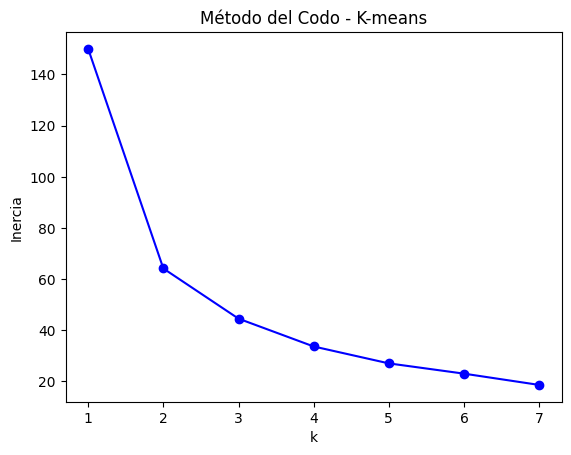

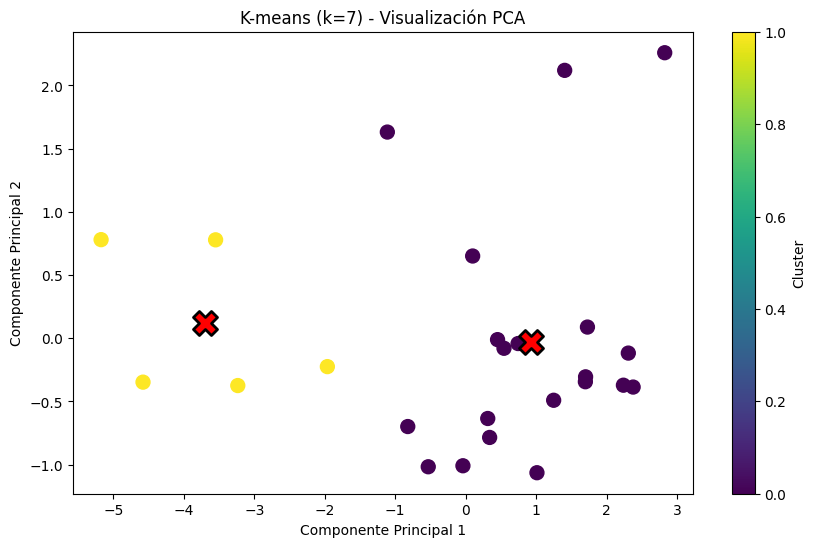

In [163]:
kmean_k2 = analisis_kmeans(X_Scaled, k=2, seed=42, init=10)

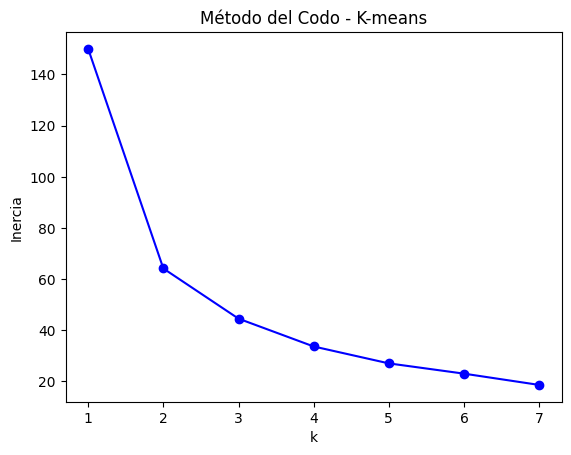

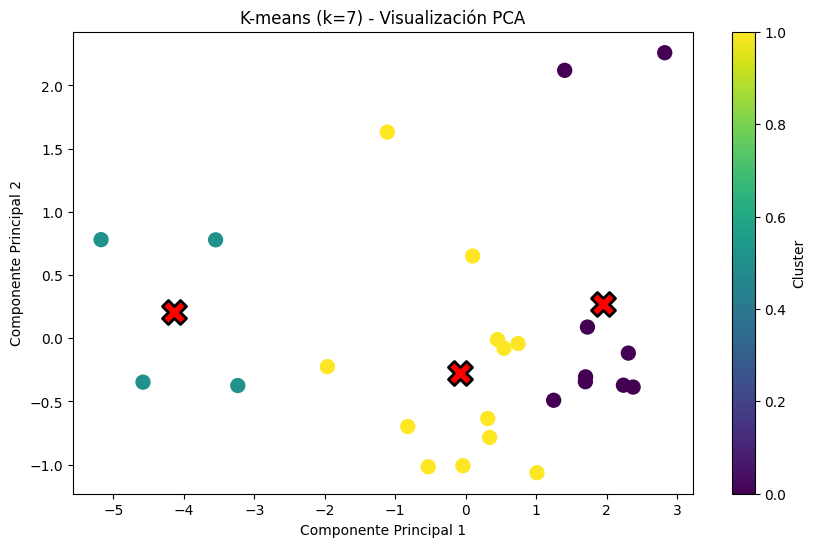

In [164]:
kmean_k3 = analisis_kmeans(X_Scaled, k=3, seed=42, init=10)


# K means con datos no estandarizados.

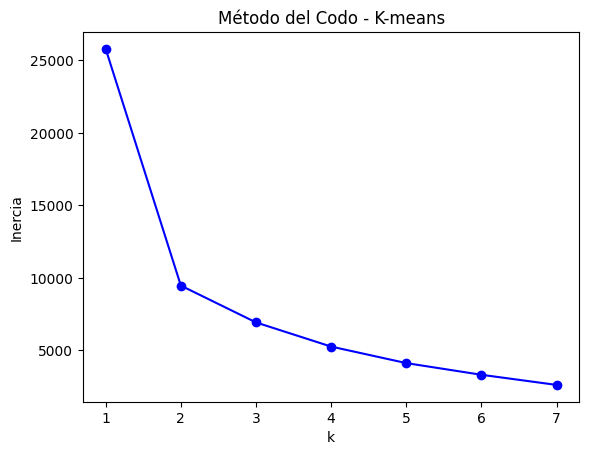

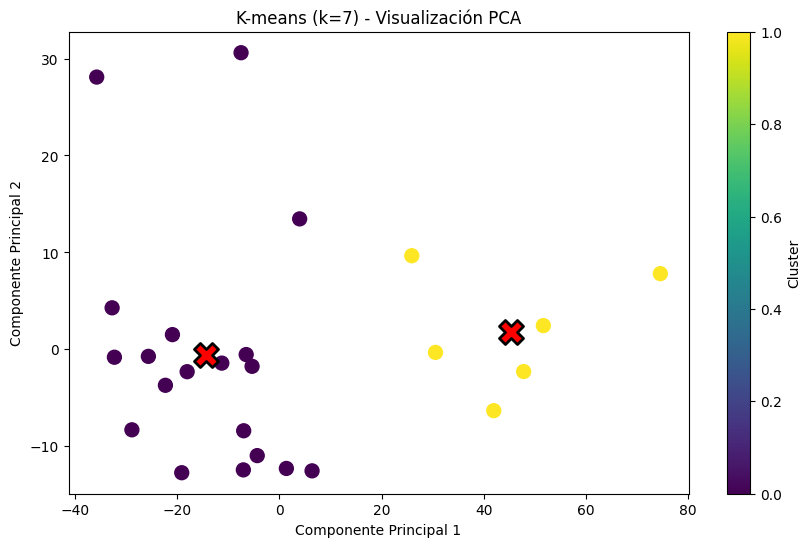

In [157]:
analisis_kmeans(X, k=2, seed=42, init=10)

# kmeans con datos no estandarizados k=3

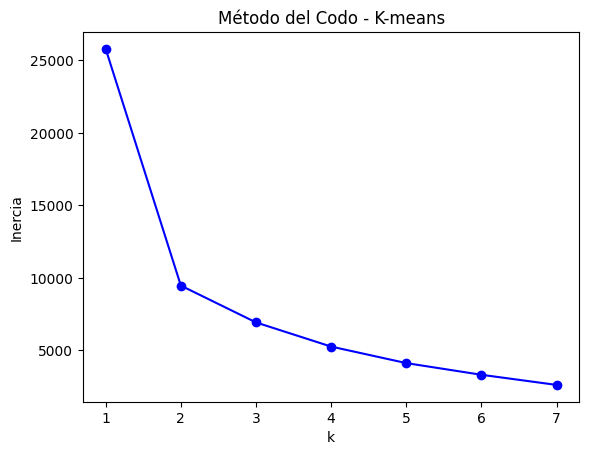

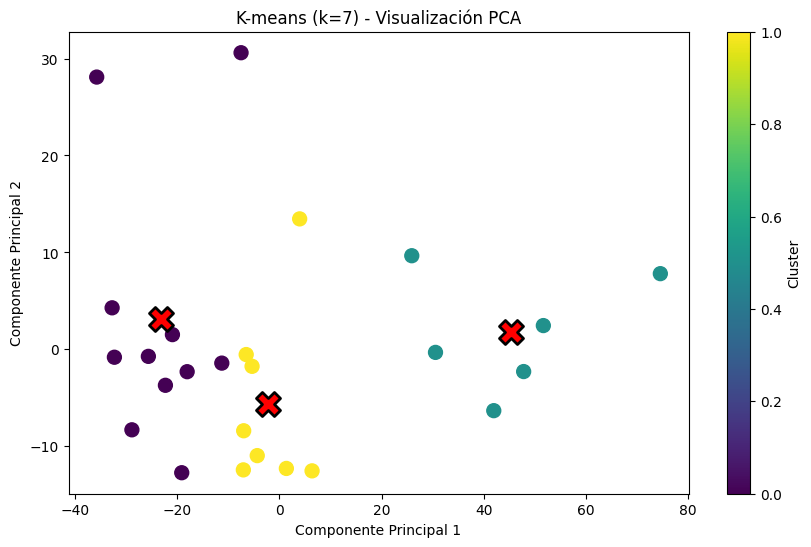

In [159]:
analisis_kmeans(X, k=3, seed=42, init=10)

In [150]:
# Promedios de datos por Cluster k=2
promedios = df.groupby('Clusterk2')[df.columns[1:-2].values].mean()
print(promedios.round(2))

           Calificacion  Percent90  PercentAceptados  RazonAlumnProf  \
Clusterk2                                                              
1                 10.62      38.75             70.00           19.25   
2                 13.05      83.67             33.33           11.48   

           GastoAnual  PercentGraduados  
Clusterk2                                
1                9.95             71.75  
2               30.71             89.57  


In [152]:
# Promedios de datos por Cluster k=3
promedios = df.groupby('Clusterk3')[df.columns[1:-2].values].mean()
print(promedios.round(2))

           Calificacion  Percent90  PercentAceptados  RazonAlumnProf  \
Clusterk3                                                              
1                 11.14      47.00             67.83           17.00   
2                 12.71      81.50             35.40           12.90   
3                 13.63      90.56             24.33            9.67   

           GastoAnual  PercentGraduados  
Clusterk3                                
1               13.38             74.00  
2               23.38             89.40  
3               41.18             92.22  


## Comparacion de Kmeans con k=3 y Cluster aglomerativo con enlace Ward

In [187]:

ari = adjusted_rand_score(kmean_k3, clusters2)
print(ari)

1.0


Valor de 1 sugiere que son exactamente iguales. Ambos metodos agrupan de manera similar los datos y estos concuerdan

## Comparacion de Ward con estandarizacion y sin estandarizar con k=2

In [223]:
ward_estandarizado = linkage(X_Scaled, method='ward')
ward_noestandar = linkage(X, method='ward')

ward_cluster1 = fcluster(ward_estandarizado, t=2, criterion='maxclust')
ward_cluster2 = fcluster(ward_noestandar, t=2, criterion='maxclust')

ari = adjusted_rand_score(ward_cluster1, ward_cluster2)
print(ari)

0.6571258199165176


## Comparacion de Complete con estandarizacion y sin estandarizar con k=2

In [226]:
complete_estandarizado = linkage(X_Scaled, method='complete')
complete_noestandar = linkage(X, method='complete')

complete_cluster1 = fcluster(complete_estandarizado, t=2, criterion='maxclust')
complete_cluster2 = fcluster(complete_noestandar, t=2, criterion='maxclust')
ari = adjusted_rand_score(complete_cluster1, complete_cluster2)
print(ari)

1.0


In [227]:

ward_cluster1_k3 = fcluster(ward_estandarizado, t=3, criterion='maxclust')
ward_cluster2_k3 = fcluster(ward_noestandar, t=3, criterion='maxclust')
ari_ward_k3 = adjusted_rand_score(ward_cluster1_k3, ward_cluster2_k3)
print(f'Ward k=3 (std vs no-std): {ari_ward_k3:.3f}')

# COMPLETE k=3
complete_cluster1_k3 = fcluster(complete_estandarizado, t=3, criterion='maxclust')
complete_cluster2_k3 = fcluster(complete_noestandar, t=3, criterion='maxclust')
ari_complete_k3 = adjusted_rand_score(complete_cluster1_k3, complete_cluster2_k3)
print(f'Complete k=3 (std vs no-std): {ari_complete_k3:.3f}')

Ward k=3 (std vs no-std): 0.209
Complete k=3 (std vs no-std): 0.396


In [229]:
comparacion = pd.DataFrame({
    'Universidad': df['Institucion'],
    'Ward_std': ward_cluster1_k3,
    'Ward_no_std': ward_cluster2_k3
})

diferentes = comparacion[comparacion['Ward_std'] != comparacion['Ward_no_std']]
print("\nUniversidades que cambian de cluster (Ward):")
print(diferentes)


Universidades que cambian de cluster (Ward):
   Universidad  Ward_std  Ward_no_std
6      CalTech         3            2
8        Brown         2            3
9      Hopkins         3            2
11       UPenn         2            3
12     Cornell         2            3
13      Norwes         2            3
14       Colum         2            3
15       Ndame         2            3
16        UVir         2            3
17       Gtown         2            3
18     CarMell         2            1
19       Umich         2            1
20      UCBerk         2            3


In [230]:
df.columns

Index(['Institucion', 'Calificacion', 'Percent90', 'PercentAceptados',
       'RazonAlumnProf', 'GastoAnual', 'PercentGraduados', 'Clusterk3',
       'Clusterk2'],
      dtype='object')

# Análisis de importancia de variables 

In [241]:
Z_completo = linkage(X_Scaled, method='ward')
clusters_completo = fcluster(Z_completo, t=3, criterion='maxclust')

variables = ['Calificacion', 'Percent90', 'PercentAceptados', 
             'RazonAlumnProf', 'GastoAnual', 'PercentGraduados']

print("=== ANÁLISIS DE IMPORTANCIA DE VARIABLES ===\n")

for i, var in enumerate(variables):
    otras_vars = [v for v in variables if v != var]
    X_sin_var = df[otras_vars].values
    
    scaler = StandardScaler()
    X_sin_var_scaled = scaler.fit_transform(X_sin_var)
    
    Z_sin_var = linkage(X_sin_var_scaled, method='ward')
    clusters_sin_var = fcluster(Z_sin_var, t=3, criterion='maxclust')
    
    ari = adjusted_rand_score(clusters_completo, clusters_sin_var)
    
    print(f"Sin {var:20s}: ARI = {ari:.3f}", end="")
    
    # Interpretación
    if ari > 0.8:
        print(" ✅ Variable NO crítica")
    elif ari > 0.6:
        print(" ⚠️ Variable moderadamente importante")
    else:
        print(" ❌ Variable MUY importante")

print("\n" + "="*60)

=== ANÁLISIS DE IMPORTANCIA DE VARIABLES ===

Sin Calificacion        : ARI = 0.256 ❌ Variable MUY importante
Sin Percent90           : ARI = 0.215 ❌ Variable MUY importante
Sin PercentAceptados    : ARI = 1.000 ✅ Variable NO crítica
Sin RazonAlumnProf      : ARI = 0.542 ❌ Variable MUY importante
Sin GastoAnual          : ARI = 0.540 ❌ Variable MUY importante
Sin PercentGraduados    : ARI = 0.752 ⚠️ Variable moderadamente importante



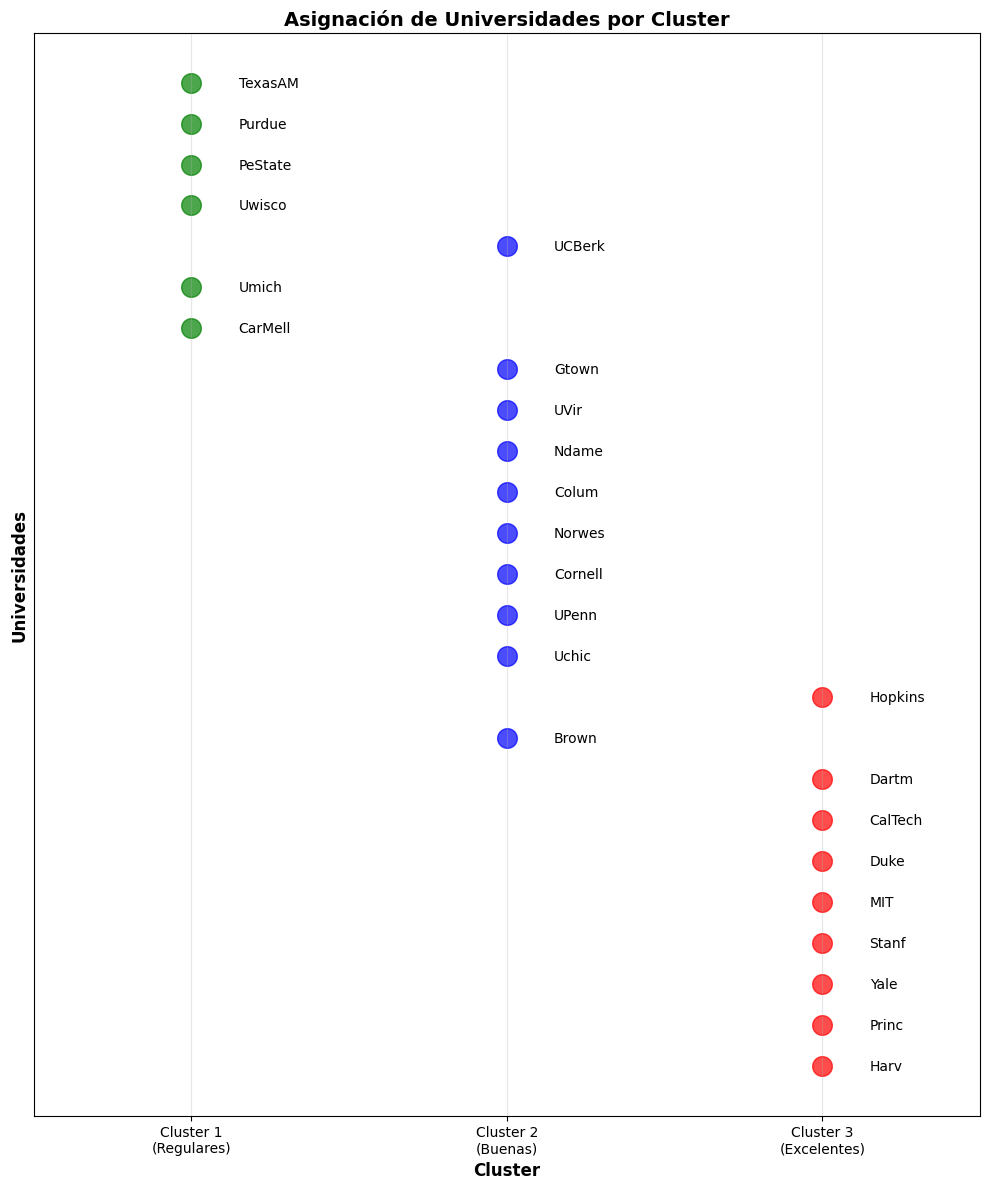

In [238]:
import matplotlib.pyplot as plt

# Preparar datos
df_sorted = df.sort_values('Clusterk3')  # Ordenar por cluster

# Crear figura
fig, ax = plt.subplots(figsize=(10, 12))

# Definir colores
colores = {1: 'green', 2: 'blue', 3: 'red'}
labels_cluster = {1: 'Regulares', 2: 'Buenas', 3: 'Excelentes'}

# Graficar cada universidad
for i, row in df_sorted.iterrows():
    cluster = row['Clusterk3']
    universidad = row['Institucion']
    
    # Punto coloreado según cluster
    ax.scatter(cluster, i, 
              color=colores[cluster], 
              s=200,  # tamaño del punto
              alpha=0.7)
    
    # Etiqueta con nombre
    ax.text(cluster + 0.15, i, universidad, 
           va='center', 
           fontsize=10)

# Configurar ejes
ax.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax.set_ylabel('Universidades', fontsize=12, fontweight='bold')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Cluster 1\n(Regulares)', 
                    'Cluster 2\n(Buenas)', 
                    'Cluster 3\n(Excelentes)'])
ax.set_yticks([])  # Quitar números del eje Y
ax.set_title('Asignación de Universidades por Cluster', 
            fontsize=14, 
            fontweight='bold')

# Grid para facilitar lectura
ax.grid(axis='x', alpha=0.3)
ax.set_xlim(0.5, 3.5)

plt.tight_layout()
plt.show()